# Small Scale Implementation of AI2

In [59]:
# Exploratory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from numpy import where
from numpy.testing import assert_array_almost_equal
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from keras import layers, backend
from keras.losses import binary_crossentropy

# Settings
import warnings
warnings.filterwarnings("ignore")
import gc


## Data Prepocessing

In [60]:
# Loading and previewing data

ds = pd.read_csv('fraudTrain.csv')[:100000] 
ds.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [61]:
ds.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,49999.500000,4.183992e+17,71.908232,48720.506960,38.538809,-90.179763,8.918773e+04,1.327916e+09,38.539719,-90.180833,0.009900
std,28867.657797,1.309964e+18,145.895400,26895.490176,5.077738,13.771942,3.015788e+05,1.459296e+06,5.110508,13.783471,0.099005
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000
25%,24999.750000,1.800365e+14,9.710000,26041.000000,34.668900,-96.790900,7.430000e+02,1.326627e+09,34.750439,-96.867861,0.000000
50%,49999.500000,3.519607e+15,48.150000,48174.000000,39.354300,-87.458100,2.456000e+03,1.327877e+09,39.365135,-87.407044,0.000000
75%,74999.250000,4.642255e+15,83.870000,72011.000000,41.894800,-80.128400,2.047800e+04,1.329150e+09,41.943393,-80.180297,0.000000
max,99999.000000,4.992346e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.330444e+09,66.659242,-66.967742,1.000000


## Sanity Check

In [62]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             100000 non-null  int64  
 1   trans_date_trans_time  100000 non-null  object 
 2   cc_num                 100000 non-null  int64  
 3   merchant               100000 non-null  object 
 4   category               100000 non-null  object 
 5   amt                    100000 non-null  float64
 6   first                  100000 non-null  object 
 7   last                   100000 non-null  object 
 8   gender                 100000 non-null  object 
 9   street                 100000 non-null  object 
 10  city                   100000 non-null  object 
 11  state                  100000 non-null  object 
 12  zip                    100000 non-null  int64  
 13  lat                    100000 non-null  float64
 14  long                   100000 non-nul

In [63]:
ds = ds.drop(labels = ['Unnamed: 0', 'trans_date_trans_time','street', 'first', 'last', 'city', 'zip', 'trans_num'], axis = 1) 

In [64]:
sum(ds.isnull().sum())

0

In [65]:
ds.duplicated().sum()

0

In [66]:
Counter(ds.is_fraud)

Counter({0: 99010, 1: 990})

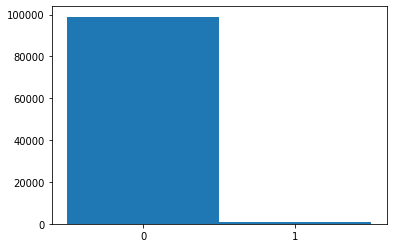

In [67]:
labels, values = zip(*Counter(ds.is_fraud).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes, labels)
plt.show()

## Data Preprocessing



In [68]:
# Splitting date of birth into 3 integer variables year, month and day

ds['birth_year'] = ds['dob'].apply(lambda x: int(x[0:4]))
ds['birth_month'] = ds['dob'].apply(lambda x: int(x[5:7]))
ds['birth_day'] = ds['dob'].apply(lambda x: int(x[8:]))

In [69]:
ds.head()

,cc_num,merchant,category,amt,gender,state,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,birth_year,birth_month,birth_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,1988,3,9
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,1978,6,21
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,1962,1,19
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,1967,1,12
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,1986,3,28


In [70]:
ds = ds.drop(['dob'], axis=1)

### Converting all categorical values to dummy variables

In [71]:

for col in ds.columns:
    if ds[col].dtypes == object:
        dummy = pd.get_dummies(ds[col])
        ds = ds.drop(col,axis=1)
        ds = pd.concat([ds,dummy], axis=1)

ds.head()

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,birth_year,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,2703186189652095,4.97,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,1988,...,0,0,0,0,0,0,0,0,0,0
1,630423337322,107.23,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,1978,...,0,0,0,0,0,0,0,0,0,0
2,38859492057661,220.11,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,1962,...,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,1967,...,0,0,0,0,0,0,0,0,0,0
4,375534208663984,41.96,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,1986,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Scaling numerical variables

sc=StandardScaler()

to_scale=['cc_num','amt','lat','long','city_pop','unix_time','merch_lat','merch_long','birth_year','birth_day','birth_month']

for var in to_scale:
    ds[var] = sc.fit_transform(ds[var].values.reshape(-1,1))


In [73]:
ds.head()

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,birth_year,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,-0.317336,-0.458812,-0.484472,0.653627,-0.284149,-1.740782,-0.494753,0.590023,0,0.851265,...,0,0,0,0,0,0,0,0,0,0
1,-0.319399,0.242105,2.038121,-2.035361,-0.295244,-1.740764,2.077950,-2.031837,0,0.275315,...,0,0,0,0,0,0,0,0,0,0
2,-0.319369,1.015813,0.717250,-1.603430,-0.281963,-1.740759,0.902260,-1.594211,0,-0.646205,...,0,0,0,0,0,0,0,0,0,0
3,-0.316701,-0.184436,1.514814,-1.592669,-0.289308,-1.740742,1.662194,-1.623709,0,-0.358230,...,0,0,0,0,0,0,0,0,0,0
4,-0.319112,-0.205273,-0.023260,0.778170,-0.295409,-1.740667,0.026471,0.837846,0,0.736075,...,0,0,0,0,0,0,0,0,0,0


## Preparing of Train and Test Sets

In [74]:
X = ds.drop('is_fraud', axis=1)
y = ds.is_fraud.values

In [75]:
X.shape

(100000, 1249)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


## Settings

We define contants for our trial. 
- BANDWIDTH refers to the number of transactions presented to the analyst per timestep
- MSE_THRESHOLD refers to the MSE value that which the analyst will classify between fraud and normal for the unsupervised module
- PROB_THRESHOLD refers to the probability value that which the analyst will classify between fraud and normal for the supervised module
- results_dict stores the model performance over n timesteps
- n_timesteps refer to how many timesteps to run and build our active model synthesis.

In [77]:
BANDWIDTH = 100
MSE_THRESHOLD = 0.03
PROB_THRESHOLD = 0.3

results_dict = {}
n_timesteps = 15

## Preparing Unseen Data

In [78]:
unseen_data = []

for i in range(n_timesteps):
    x_train, x_unseen, y_train, y_unseen = train_test_split(x_train,y_train,test_size=(0.05+i*0.005), random_state=42)
    unseen_data.append([x_train, x_unseen, y_train, y_unseen])
    print(x_unseen.shape)
    print(Counter(y_unseen))


(4000, 1249)
Counter({0: 3955, 1: 45})
(4180, 1249)
Counter({0: 4137, 1: 43})
(4310, 1249)
Counter({0: 4270, 1: 40})
(4389, 1249)
Counter({0: 4341, 1: 48})
(4419, 1249)
Counter({0: 4379, 1: 40})
(4403, 1249)
Counter({0: 4357, 1: 46})
(4344, 1249)
Counter({0: 4301, 1: 43})
(4247, 1249)
Counter({0: 4210, 1: 37})
(4114, 1249)
Counter({0: 4073, 1: 41})
(3952, 1249)
Counter({0: 3915, 1: 37})
(3765, 1249)
Counter({0: 3731, 1: 34})
(3558, 1249)
Counter({0: 3515, 1: 43})
(3336, 1249)
Counter({0: 3305, 1: 31})
(3104, 1249)
Counter({0: 3081, 1: 23})
(2866, 1249)
Counter({0: 2838, 1: 28})


## Helper Functions

In [79]:
# Autoencoder

# Function: get_normal_attack(x_train, y_train)
# Input: n*m matrix, n*1 array
# Return output: matrix of non-fraud training data and a matrix of fraud training data
# Function Description: 
#   - Splits training data into fraud and non-fraud
#   - prints fraud and non-fraud counts

def get_normal_attack(x_train, y_train):
    train = x_train
    train['Class'] = y_train
    train

    normal_mask = train['Class']==0
    attack_mask = train['Class']==1

    train.drop('Class',axis=1,inplace=True)

    train_normal = train[normal_mask]
    train_attack = train[attack_mask]

    print(f"Normal count: {len(train_normal)}")
    print(f"Attack count: {len(train_attack)}")

    x_normal_train = train_normal.values
    x_attack_train = train_attack.values

    return  x_normal_train, x_attack_train

# Function: build_autoencoder(x, y)
# Input: n*m matrix, n*1 array
# Return output: autoencoder model and model history
# Function Description: 
#   - builds and compiles a replicator neural network with dense layers
#   - fits the model to input X and y data


def build_autoencoder(x, y):
    
    # define our early stopping
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=8,
        verbose=1, 
        mode='min',
        restore_best_weights=True
    )

    tf.keras.backend.set_floatx('float64')
    model = tf.keras.Sequential()
    model.add(layers.Dense(32, activation='tanh'))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(4, activation='tanh')) 
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(32, activation='tanh'))
    model.add(layers.Dense(x.shape[1])) 
    model.compile(loss='mean_squared_error', optimizer='nadam')
    history = model.fit(x,
                        x,
                        epochs=32,
                        batch_size=50,
                        validation_split=0.1,
                        callbacks=[early_stop]
                    )

    return model, history


# Function: map_mse_to_res(x, threshold)
# Input: float, float
# Return output: 1 or 0 integer label
# Function Description: 
#   - maps an mse value to 1 or 0 depending on threshold

def map_mse_to_res(x, threshold):
    if x > threshold:
        return 1
    else:
        return 0


# Function: get_unseen_class_unsup(model, x_unseen, MSE_THRESHOLD)
# Input: autoencoder model, unseen n*m matrix, threshold value
# Return output: dataframe of ranked entries based on mse values and their corresponding mapped 1 or 0 label
# Function Description: 
#   - predicts the unseen data using the autoencoder model
#   - calculates reconstruction error as MSE between input and output data.
#   - ranks the data in terms of mse, and slices to size depending on analyst daily bandwidth value 
#   - maps the MSE to labels, simulating how a analyst will label the data.


def get_unseen_class_unsup(model, x_unseen, MSE_THRESHOLD):
    unseen_proba = model.predict(x_unseen)
    mse = np.mean(np.power(unseen_proba - x_unseen, 2), axis=1)
    mse_table = pd.DataFrame([x_unseen.index,mse]).T
    mse_table = mse_table.rename(columns={0:'index_', 1:'mse'})
    mse_table = mse_table.sort_values(by='mse', ascending=False)[:int(BANDWIDTH/2)]
    mse_table['Class'] = mse_table['mse'].apply(lambda x: map_mse_to_res(x, MSE_THRESHOLD))
    return mse_table

# Supervised Models

# Function: ens_get_bceloss(pred,true)
# Input: n*1 array, n*1 array
# Return output: float of cross-entropy loss value
# Function Description: 
#   - calculates binary crossentropy loss value given predicted and true values 

def ens_get_bceloss(pred,true):
    y_true = backend.variable(true)
    y_pred = backend.variable(pred)
    mean_ce = backend.eval(binary_crossentropy(y_true, y_pred))
    return mean_ce

# Function: ens_get_auc(y_pred_proba, y)
# Input: n*1 array, n*1 array
# Return output: float of auc value
# Function Description: 
#   - returns auc value given predicted class probabilities and true class 

def ens_get_auc(y_pred_proba, y):
    [fpr, tpr, thr] = roc_curve(y, y_pred_proba)
    return auc(fpr, tpr)

# Function: get_results_dict(model, x_test, y_test)
# Input: model, n*m matrix, n*1 array
# Return output: dictionary of scores
# Function Description: 
#   - predicts x_test class labels
#   - calculates loss, accuracy, auc, recall and precision

def get_results_dict(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    score_dict = {
        "loss": ens_get_bceloss(y_pred_proba, y_test),
        "accuracy": accuracy_score(y_test, y_pred),
        "auc": ens_get_auc(y_pred_proba, y_test),
        "recall": recall,
        "precision": precision,
        "F1_score": f1_score(y_test,y_pred),
        "F2_score": (5 * precision * recall) / (4 * precision + recall)
    }
    return score_dict

# Function: rfc_eval(x_train,y_train,x_test,y_test)
# Input: n*m matrix, n*1 array, n*m matrix, n*1 array
# Return output: RandomForest Model, results dictionary
# Function Description: 
#   - builds and fits a RandomForest model
#   - evaluate the model on test data

def rfc_eval(x_train,y_train,x_test,y_test):
    rfc = RandomForestClassifier(n_estimators=150, random_state=42)
    rfc.fit(x_train,y_train)
    res = get_results_dict(rfc, x_test, y_test)
    return rfc, res

# Function: map_to_res(x, threshold)
# Input: float probabilities, float threshold
# Return output: integer class labels
# Function Description: 
#   - Maps a prediction probability x to a class label based on threshold

def map_to_res(x, threshold):
    if x > threshold:
        return 1
    else:
        return 0

# Function: get_unseen_class(model, x_unseen, THRESHOLD)
# Input: RandomForest model, n*m matrix, threshold value
# Return output: dataframe 
# Function Description: 
#   - predicts the unseen data using the input model
#   - ranks the data in terms of prediction probabilities, and slices to size depending on analyst daily bandwidth value 
#   - maps the prediction probabiltiies to labels, simulating how a analyst will label the data.

def get_unseen_class(model, x_unseen, THRESHOLD):
    pred_proba_unseen = model.predict_proba(x_unseen)
    unseen_proba = pd.concat([pd.DataFrame(pred_proba_unseen, columns=['pred_0', 'pred_1']), pd.DataFrame(x_unseen.index, columns=['index_'])], axis=1)
    unseen_proba = unseen_proba.sort_values(by='pred_1', ascending=False)[:int(BANDWIDTH/2)]
    unseen_proba['Class'] = unseen_proba['pred_1'].apply(lambda x: map_to_res(x, THRESHOLD)) 
    return unseen_proba


# Combining Data

# Function: get_new_train(unseen_class_sup, unseen_class_unsup, x_unseen, x_train, y_train)
# Input: Ranked Unseen dataframe from supervised model, Ranked Unseen dataframe from unsupervised model, n*m matrix of unseen data, historical data n*m matrix, historical label 
# Return output: dataframe of new train data and array of new labels
# Function Description: 
#   - combines feedbacked data and its corresponding labels to historical data.

def get_new_train(unseen_class_sup, unseen_class_unsup, x_unseen, x_train, y_train):
    x_labeled_new_sup = x_unseen.loc[unseen_class_sup.index_]
    y_labeled_new_sup = unseen_class_sup.Class.values
    x_train_temp =  x_train.append(x_labeled_new_sup)
    y_train_temp = np.concatenate((y_train,y_labeled_new_sup), axis=0)
    x_labeled_new_unsup = x_unseen.loc[unseen_class_unsup.index_]
    y_labeled_new_unsup = unseen_class_unsup.Class.values
    x_train_new =  x_train_temp.append(x_labeled_new_unsup)
    y_train_new = np.concatenate((y_train_temp,y_labeled_new_unsup), axis=0)
    return x_train_new, y_train_new

## Timestep 0: Before introduction of new data

### Training Unsupervised Model for next timestep

In [80]:
x_normal_train_0, x_attack_train_0 = get_normal_attack(x_train, y_train)

Normal count: 20806
Attack count: 207


In [81]:
# garbace collection

gc.collect()

2839

In [82]:
# Building initial unsupervised model based on historical labelled data

model0, history0 = build_autoencoder(x_normal_train_0, x_attack_train_0)

Epoch 1/32
375/375 [==============================] - 5s 12ms/step - loss: 0.0082 - val_loss: 0.0070
Epoch 2/32
375/375 [==============================] - 4s 11ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 3/32
375/375 [==============================] - 4s 11ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 4/32
375/375 [==============================] - 4s 11ms/step - loss: 0.0070 - val_loss: 0.0068
Epoch 5/32
375/375 [==============================] - 4s 11ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 6/32
375/375 [==============================] - 4s 11ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 7/32
375/375 [==============================] - 4s 11ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 8/32
375/375 [==============================] - 5s 12ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 9/32
375/375 [==============================] - 4s 12ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 10/32
375/375 [==============================] - 4s 11ms/step - loss: 0.0064 - val_lo

In [83]:
# Building supervised model based on historical data

rfc0, time_0_res = rfc_eval(x_train,y_train,x_test,y_test)
results_dict['timestep 0'] = time_0_res

# Results at timestep 0. This is our baseline results for RandomForest.

pd.DataFrame(results_dict)


,timestep 0
F1_score,0.354839
F2_score,0.255814
accuracy,0.992000
auc,0.973176
loss,0.023700
precision,1.000000
recall,0.215686


In [84]:
# storing models for training across timesteps

supervised_models = []
unsupervised_models = []
supervised_models.append(rfc0)
unsupervised_models.append(model0)

x_train_ = x_train
y_train_ = y_train

## Executing a simplified AI2 model algorithm for 15 timesteps. 

In [85]:


for timestep in range(n_timesteps):

    print(f"\n >>> TIMESTEP {timestep + 1 } =============================================================== \n")

    # clear garbage
    gc.collect()

    x_unseen = unseen_data[timestep][1]

    # Getting ranking from unsupervised learning and classifying based on probability threshold 
    unsup_model = unsupervised_models[timestep]
    mse_table = get_unseen_class_unsup(unsup_model, x_unseen, MSE_THRESHOLD)
    print(mse_table)

    # Getting ranking from supervised learning and classifying based on probability threshold 
    sup_model = supervised_models[timestep]
    unseen_class = get_unseen_class(sup_model, x_unseen, PROB_THRESHOLD)
    print(unseen_class)

    # Updating training set based on input from Supervised and Unsupervised Learning
    x_train_, y_train_ = get_new_train(unseen_class, mse_table, x_unseen, x_train_, y_train_)

    # Evaluating new training set using Supervised Learning
    new_sup_model, time_res = rfc_eval(x_train_,y_train_,x_test,y_test)
    supervised_models.append(new_sup_model)

    # Saving results to Dictionary
    results_dict['timestep ' + str(timestep+1)] = time_res

    # Training new unsupervised model for next timestep
    x_normal_train_, x_attack_train_ = get_normal_attack(x_train_, y_train_)
    model_, history_ = build_autoencoder(x_normal_train_, x_attack_train_)
    unsupervised_models.append(model_)






 >>> TIMESTEP 1 =============================================================== 

       index_       mse  Class
962    1784.0  0.372256      1
2023   5627.0  0.275129      1
2108  71305.0  0.063494      1
927   64584.0  0.060540      1
175   21334.0  0.060225      1
3830  19576.0  0.055935      1
101   88592.0  0.048764      1
2938  76695.0  0.048007      1
377   97938.0  0.047828      1
1689  95593.0  0.044511      1
3439  74502.0  0.042507      1
432   33642.0  0.041871      1
69    73601.0  0.039711      1
679   78026.0  0.038823      1
1615  76595.0  0.038623      1
1445  16970.0  0.037187      1
431   74054.0  0.036003      1
748   37420.0  0.035290      1
2249  33472.0  0.034880      1
3998  85974.0  0.033983      1
21    98055.0  0.033722      1
2063   3722.0  0.033367      1
2523  64542.0  0.032408      1
1912  27919.0  0.031828      1
2596  27616.0  0.031430      1
1965  28885.0  0.030644      1
3267   7880.0  0.029442      0
1534  79391.0  0.028439      0
392   74145.0  0.0

## Analysing model performance across timesteps.

In [86]:
pd.DataFrame(results_dict)

,timestep 0,timestep 1,timestep 2,timestep 3,timestep 4,timestep 5,timestep 6,timestep 7,timestep 8,timestep 9,timestep 10,timestep 11,timestep 12,timestep 13,timestep 14,timestep 15
loss,0.023700,0.023352,0.022222,0.022471,0.023276,0.025025,0.023977,0.025323,0.025211,0.027386,0.025936,0.027837,0.026624,0.026664,0.026686,0.028530
accuracy,0.992000,0.992600,0.992550,0.993250,0.993600,0.993100,0.993100,0.993250,0.992800,0.992850,0.992700,0.992700,0.992800,0.992500,0.992350,0.992300
auc,0.973176,0.976294,0.981158,0.982143,0.980019,0.974603,0.982111,0.977615,0.976932,0.970447,0.975723,0.970505,0.976121,0.978975,0.978938,0.971272
recall,0.215686,0.284314,0.289216,0.362745,0.406863,0.406863,0.416667,0.431373,0.450980,0.475490,0.470588,0.480392,0.490196,0.465686,0.475490,0.480392
precision,1.000000,0.966667,0.936508,0.936709,0.922222,0.830000,0.817308,0.822430,0.741935,0.729323,0.716418,0.710145,0.714286,0.698529,0.678322,0.671233
F1_score,0.354839,0.439394,0.441948,0.522968,0.564626,0.546053,0.551948,0.565916,0.560976,0.575668,0.568047,0.573099,0.581395,0.558824,0.559078,0.560000
F2_score,0.255814,0.331050,0.335609,0.413408,0.458057,0.453057,0.461957,0.476706,0.489362,0.511064,0.505263,0.513627,0.523013,0.498950,0.505735,0.509356


Text(0.5, 1.0, 'Recall across Timesteps')

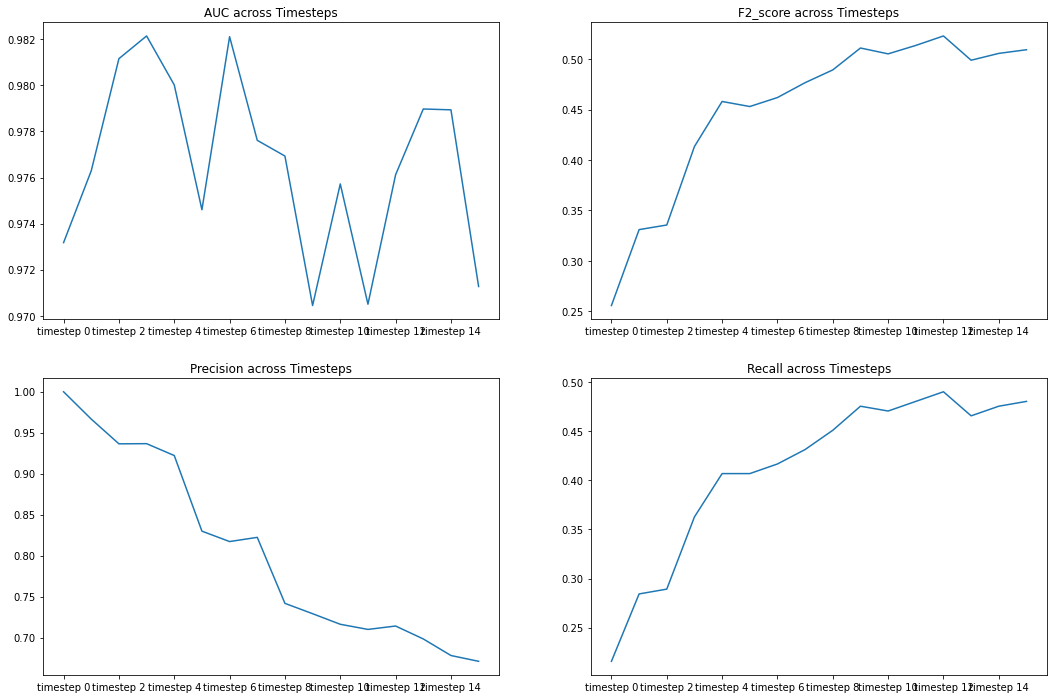

In [87]:
rs = pd.DataFrame(results_dict).T

fig = plt.figure(figsize = (18, 12))

ax = fig.add_subplot(2, 2, 1)
rs.auc.plot(ax=ax)
plt.title('AUC across Timesteps')

ax = fig.add_subplot(2, 2, 2)
rs.F2_score.plot(ax=ax)
plt.title('F2_score across Timesteps')

ax = fig.add_subplot(2, 2, 3)
rs.precision.plot(ax=ax)
plt.title('Precision across Timesteps')

ax = fig.add_subplot(2, 2, 4)
rs.recall.plot(ax=ax)
plt.title('Recall across Timesteps')

